# Discussion Post 3: Exploratory Data Analysis 
--What do you find that is different from what you expected? 
--What are some of the key trends or observations in your datasets? 
--Are there additional datasets that you could incorporate? 
--How are you cleaning the data or accounting for messy data?
--Refine your hypothesis, if necessary. Provide rationale for your exploration. 

For this Exploratory Data Analysis, we combined five years of survey data (2016-2020), and selected columns (features) that relate to our target question labeled "Q237" in our dataset to make a new dataframe for future ML project. Q237 is the respondent's answer to the question (asked each year) "Are you considering leaving your organization within the next year, and if so, why?" We call this "the stay or go decision." (The question was asked slightly differently in 2020, where is is Q231.)

In [1]:
#load libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set(style="ticks", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# to look up the questions 
questions= pd.read_csv('survey_questions.csv', low_memory=False)

# Survey Indexes: EEI, GSI, and NIQ
There are 186 variables in our dataset, with 2.7M rows across all five years. To narrow our focus on features that might predict the Stay or Go Decision, we chose columns that reflected responses to questions that were included in three indexes in past survey years: the Employee Engagement Index (EEI), the Global Satisfaction Index (GSI), and the New Inclusion Quotient (NIQ). The EEI and the GSI are the most freqently reported indexes each year. In addition, the EEI was found to positively correlate with the decision to Stay or Go when the EEI was introduced in 2016. Therefore, we will focus on the questions in the EEI and GSI index. We also selected demographics columns for future analysis.

EEI index questions:<br>
Q104 my_work_experience My work gives me a feeling of personal accomplishment.<br>
Q105 my_work_experience I know what is expected of me on the job. <br>
Q106 my_work_experience My workload is reasonable. <br>
Q107 my_work_experience My talents are used well in the workplace.<br>
Q108 my_work_experience I know how my work relates to the agency's goals. <br>
Q122 my_work_experience Supervisors in my work unit support employee development.<br>
Q123 my_work_experience My supervisor listens to what I have to say. <br>
Q124 my_work_experience My supervisor treats me with respect.<br>
Q125 my_work_experience I have trust and confidence in my supervisor. <br>
Q126 my_work_experience Overall_ how good a job do you feel is being done by your immediate supervisor? <br>
Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.<br>
Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.<br>
Q129 my_work_experience Managers communicate the goals of the organization.<br>
Q131 my_work_experience Overall_ how good a job do you feel is being done by the manager directly above your immediate supervisor? <br>
Q132 my_work_experience I have a high level of respect for my organization's senior leaders. <br>
Q237 demographics Are you considering leaving your organization within the next year_ and if so_ why?<br>

GSI	index questions:<br>
Q118	my_agency	I recommend my organization as a good place to work.<br>
Q137	individual	Considering everything_ how satisfied are you with your job?<br>
Q138	individual	Considering everything_ how satisfied are you with your pay?<br>
Q139	individual	Considering everything_ how satisfied are you with your organization?<br>

Demographic questions:<br>
Q222	demographics	Please select the racial category or categories with which you most closely identify. <br>
Q223	demographics	Are you of Hispanic_ Latino_ or Spanish origin? <br>
Q224	demographics	Are you an individual with a disability? <br>
Q225	demographics	What is your age group? <br>
Q226	demographics	What is your supervisory status? <br>
Q227	demographics	How long have you been with the Federal Government (excluding military service)? <br>
Q229	demographics	What is your US military service status? <br>
Q235	demographics	What is the highest degree or level of education you have completed?<br>
<b>Q237	demographics	Are you considering leaving your organization within the next year_ and if so_ why?</b><br>
<b>Q231 (2020 only)	demographics	Today: (September-October 2020) Are you considering leaving your organization within the next year, and if so, why?</b>
Q232 (2020 only)	demographics	Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?<br>


New Inclusion Quotient index questions:<br>
Q130	my_work_experience	Managers promote communication among different work units (for example_ about projects_ goals_ needed resources).<br>
Q268	my_work_experience	Managers support collaboration across work units to accomplish work objectives.<br>
Q103	my_work_experience	I feel encouraged to come up with new and better ways of doing things.<br>
Q238	my_work_experience	I have enough information to do my job well.<br>
Q255	my_agency	Employees have a feeling of personal empowerment with respect to work processes.<br>
Q111	my_work_unit	In my work unit_ steps are taken to deal with a poor performer who cannot or will not improve.<br>
Q113	my_work_unit	In my work unit_ differences in performance are recognized in a meaningful way.<br>
Q251	my_work_unit	Awards in my work unit depend on how well employees perform their jobs.<br>
Q260	my_agency	Arbitrary action_ personal favoritism and coercion for partisan political purposes are not tolerated.<br>
Q261	my_agency	Prohibited Personnel Practices (for example_ illegally discriminating for or against any employee/applicant_ obstructing a person's right to compete for employment_ knowingly violating veterans' preference requirements) are not tolerated.<br>
Q121	my_work_experience	My supervisor is committed to a workforce representative of all segments of society.<br>
Q256	my_agency	Creativity and innovation are rewarded.<br>
Q258	my_agency	Policies and programs promote diversity in the workplace (for example_ recruiting minorities and women_ training in awareness of diversity issues_ mentoring).<br>
Q266	my_work_experience	Supervisors work well with employees of different backgrounds.<br>
Q120	my_work_experience	My supervisor supports my need to balance work and other life issues.<br>
Q264	my_work_experience	My supervisor provides me with constructive suggestions to improve my job performance.<br>

In [3]:
#look specific [[rows],[cols];
questions.iloc[[2,186],[2]]

,question_text
2,Randomly Assigned Number for individual cases
186,Are you looking for another job because of the...


In [4]:
#Joy's questions info
#dfquestions = pd.read_csv('/Users/wuc3/Downloads/Capstone/survey_questions joy1.csv' )
#dfquestions.head(50)

# Read in to dataframes 2016 to 2020 FEVS survey data

In [2]:
# need to give the path of these file on you own
df2016 = pd.read_csv('Standardized_Columns_fevs_2016_prdf.csv', low_memory=False)
df2017 = pd.read_csv('Standardized_Columns_fevs_2017_prdf.csv', low_memory=False)
df2018 = pd.read_csv('Standardized_Columns_fevs_2018_prdf.csv', low_memory=False)
df2019 = pd.read_csv('Standardized_Columns_fevs_2019_prdf.csv', low_memory=False)
df2020 = pd.read_csv('Standardized_Columns_fevs_2020_prdf.csv', low_memory=False)


In [4]:
#find cols' names in a dataframe: 
for col in df2016.columns:
    print(col)

response_id
year
agency_id
Q234
Q226
Q228
Q225
Q236
Q237
Q102
Q238
Q103
Q104
Q239
Q105
Q240
Q241
Q242
Q106
Q107
Q108
Q243
Q244
Q245
Q246
Q109
Q247
Q248
Q110
Q249
Q250
Q111
Q113
Q251
Q252
Q253
Q254
Q114
Q255
Q115
Q256
Q257
Q258
Q116
Q259
Q260
Q261
Q117
Q118
Q119
Q120
Q262
Q263
Q121
Q264
Q122
Q123
Q124
Q265
Q125
Q126
Q127
Q128
Q266
Q129
Q267
Q130
Q268
Q131
Q132
Q133
Q134
Q135
Q136
Q269
Q270
Q271
Q137
Q138
Q139
Q233
random
Q112
Q140
Q141
Q142
Q143
Q144
Q145
Q146
Q147
Q148
Q149
Q150
Q151
Q152
Q153
Q154
Q155
Q156
Q157
Q158
Q159
Q160
Q161
Q162
Q163
Q164
Q165
Q166
Q167
Q168
Q169
Q170
Q171
Q172
Q173
Q174
Q175
Q176
Q177
Q178
Q179
Q180
Q181
Q182
Q183
Q184
Q185
Q186
Q187
Q188
Q189
Q190
Q191
Q192
Q193
Q194
Q195
Q196
Q197
Q198
Q199
Q200
Q201
Q202
Q203
Q204
Q205
Q206
Q207
Q208
Q209
Q210
Q211
Q212
Q213
Q214
Q215
Q216
Q217
Q218
Q219
Q220
Q221
Q222
Q223
Q224
Q227
Q229
Q230
Q231
Q232
Q235
Q272
Q273
Q274
Q275
Q276
Q277
Q278
Q279
Q280
Q281
Q282
Q283
Q284
Q285
StayorGo


# Combine 5 years of FEVS survey data into one dataframe.
Select only the questions related to the three indexes, plus demographics questions, for our features. Call the new dataframe "combined5yearindex3" for use in future Machine Learning (ML) applications.

In [5]:
#to combine 5 year survey data
frames = [df2016, df2017, df2018,df2019,df2020]
combined5year= pd.concat(frames)
#to generate subsets of questions we are interested from 3 the three indexes and demographic information:
#combined5yearindex3 =pd.DataFrame(data=combined5year,
#                           columns=['year','agency_id','Q222','Q223','Q224','Q225','Q226','227','Q229','Q235',
#                                    'Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132',
#                                    'Q118','Q137','Q138','Q139',
#                                    'Q130','Q268','Q103','Q238','Q255','Q111','Q113','Q251','Q260','Q261',
#                                    'Q121','Q256','Q258','Q266','Q120','Q264',
#                                    'Q231','Q232','Q237'])


In [6]:
combined5year.head()



,response_id,year,agency_id,Q234,Q226,Q228,Q225,Q236,Q237,Q102,...,Q277,Q278,Q279,Q280,Q281,Q282,Q283,Q284,Q285,StayorGo
0,2016000002,2016,TR,TR93,A,B,B,A,A,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay
1,2016000003,2016,AF,AF1C,A,A,B,B,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay
2,2016000004,2016,TR,TRAD,A,A,B,B,A,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay
3,2016000005,2016,TR,TR93,A,A,B,B,D,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retire
4,2016000006,2016,HE,HE09,B,B,B,B,A,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay


In [7]:
combined5year.tail()


,response_id,year,agency_id,Q234,Q226,Q228,Q225,Q236,Q237,Q102,...,Q277,Q278,Q279,Q280,Q281,Q282,Q283,Q284,Q285,StayorGo
624795,2020624797,2020,HS,NaN,A,B,B,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer
624796,2020624798,2020,HS,NaN,A,A,B,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay
624797,2020624799,2020,HS,NaN,A,B,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer
624798,2020624800,2020,HS,NaN,A,B,A,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retire
624799,2020624801,2020,HS,NaN,B,B,A,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay


# Save the combined5yearindex3 dataframe to a new CSV file that can be used for future ML.

In [8]:
# save a csv file to the local:
combined5year.to_csv("combined5year.csv", sep='\t', encoding='utf-8')

# Frequency analyses of Stay or Go across our 5-year dataframe:
The analyses below extract the frequency of the Stay or Go response for each year (was Q237 for 2016-2019 and Q231 for 2020)

In [10]:
#response frequency by years
print(f"StayorGo:")
byyear= combined5year['year'].value_counts()
#response frequency by StayorGo 
byStayorGo=combined5year['StayorGo'].value_counts()
print(byyear)
#print("From 2016-2019, A is Stay, C is Leave:")
#print(byQ237)
row_count = combined5year.shape[0]
print(row_count)
col_count = combined5year.shape[1]
#print(f"Q231:")
#byyear= combined5yearindex3['year'].value_counts()
#response frequence by Q231 stayorgo in 2020
#byQ231=combined5yearindex3['Q231'].value_counts()
#print(byyear)
#print("In 2020, A is Stay, D is Leave:")
#print(byQ231)
#row_count = combined5yearindex3.shape[0]
#print(row_count)
#col_count = combined5yearindex3.shape[1]
print(f"There are {row_count:.0f} survey responses over the last 5 years, and {col_count:.0f} features were considered") 

StayorGo:
2020    624800
2019    615395
2018    598003
2017    486105
2016    407789
Name: year, dtype: int64
2732092
There are 2732092 survey responses over the last 5 years, and 189 features were considered


# For each year of the survey, analyze and plot the number of people who say they plan to leave Federal Service within the next year.
Below are Visualizations "byyear" and "byStayorGo": the results indicated that there are between 400,000 and 630,000 responses for each year's survey within the 5 years (2016-2020). <br>
Only about 3.998 percent of people express an intent to leave Federal to other places during 2016 to 2020.<br>
Fully 67.524 percent of people expressed an intent to stay in Federal Service with the same job during 2016 to 2020.<br>
<b>Important: The data with regard the decision to Stay or Go is imbalanced.<br></b>

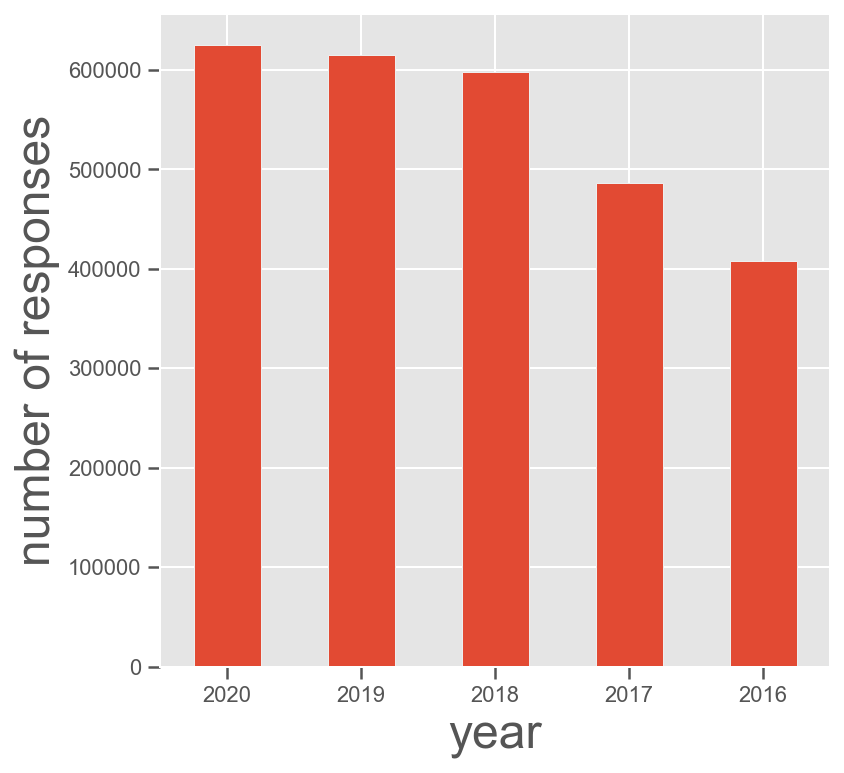

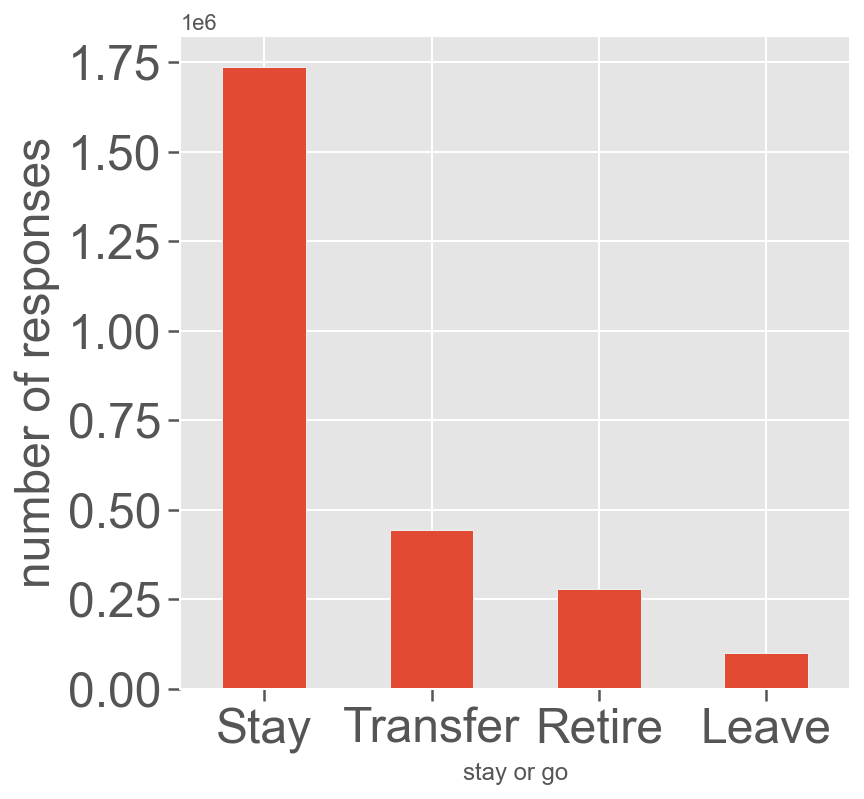

400000-624800 employees took the survey each year during 2016 to 2020.
Only 3.860 percent of people expressed intent to leave Federal Service for other places during 2016 to 2020.
Fully 67.925 percent of people devided to stay in Federal Service  in the same job during 2016 to 2020.
The data with regard to the Stay or Go question is imbalanced.


In [15]:
plt.style.use('ggplot')
# create a bar graph to depict the frequencies
byyear.plot(kind='bar', figsize=(6,6),rot=0);
plt.xlabel('year',fontsize=24)
plt.ylabel('number of responses',fontsize=24)
plt.show()
byStayorGo.plot(kind='bar', figsize=(6,6),rot=0,fontsize=24);
plt.xlabel('stay or go')
plt.ylabel('number of responses', fontsize=24)
plt.show()
#caculate the percent of stayorgo decision
Stay=260738+317645+382646+381939+393154
Transfer=71018+71128+100354+108494+91472
Retire=40565+51041+62540+61271+63281
Leave=13849+19504+22298+23857+19150
StayFreq=Stay/(Stay+Transfer+Retire+Leave)
LeaveFreq=Leave/(Stay+Transfer+Retire+Leave)
print("400000-624800 employees took the survey each year during 2016 to 2020.")
print( f"Only {LeaveFreq*100:.3f} percent of people expressed intent to leave Federal Service for other places during 2016 to 2020.")
print(f"Fully {StayFreq*100:.3f} percent of people devided to stay in Federal Service  in the same job during 2016 to 2020.")
print("The data with regard to the Stay or Go question is imbalanced.")


# Visualize responses to Stay or Go for each year from 2016-2020.

In [16]:
#make sub-dataframe by year
byStayorGo2016=combined5year.loc[combined5year['year'] == 2016]['StayorGo'].value_counts()
byStayorGo2017=combined5year.loc[combined5year['year'] == 2017]['StayorGo'].value_counts()
byStayorGo2018=combined5year.loc[combined5year['year'] == 2018]['StayorGo'].value_counts()
byStayorGo2019=combined5year.loc[combined5year['year'] == 2019]['StayorGo'].value_counts()
byStayorGo2020=combined5year.loc[combined5year['year'] == 2020]['StayorGo'].value_counts()

print(byStayorGo2016, byStayorGo2017,byStayorGo2018,byStayorGo2019,byStayorGo2020)

Stay        260738
Transfer     71018
Retire       40565
Leave        13849
Name: StayorGo, dtype: int64 Stay        317645
Transfer     71128
Retire       51041
Leave        19504
Name: StayorGo, dtype: int64 Stay        382646
Transfer    100354
Retire       62540
Leave        22298
Name: StayorGo, dtype: int64 Stay        381939
Transfer    108494
Retire       61271
Leave        23857
Name: StayorGo, dtype: int64 Stay        393154
Transfer     91472
Retire       63281
Leave        19150
Name: StayorGo, dtype: int64


StayorGo:Are you considering leaving your organization within the next year_ and if so_ why?Stay: No. Transfer: Yes,to take another Federal job. Retire: Other Leave: Yes,to take a job outside Federal Gov.


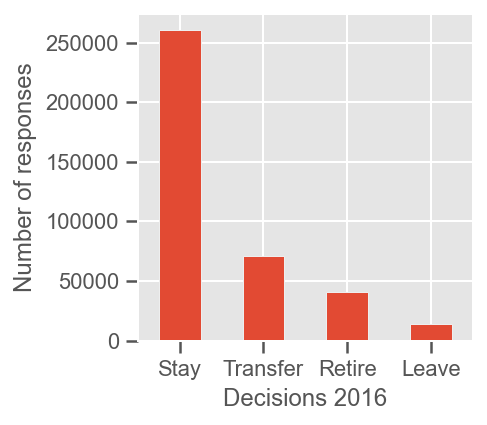

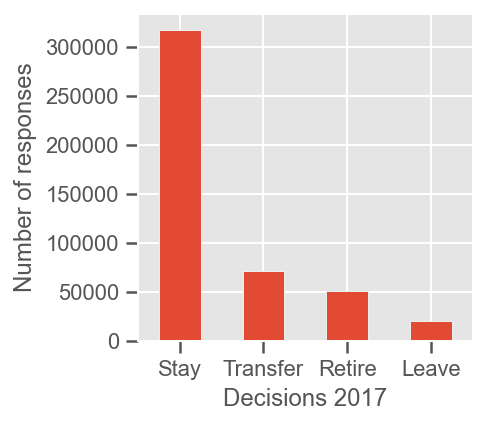

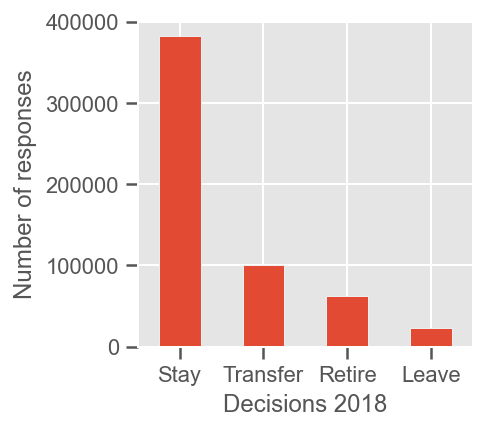

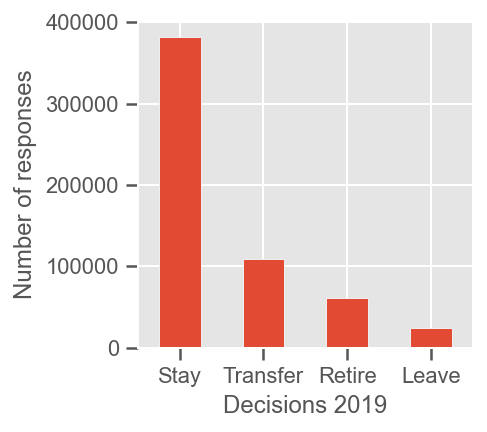

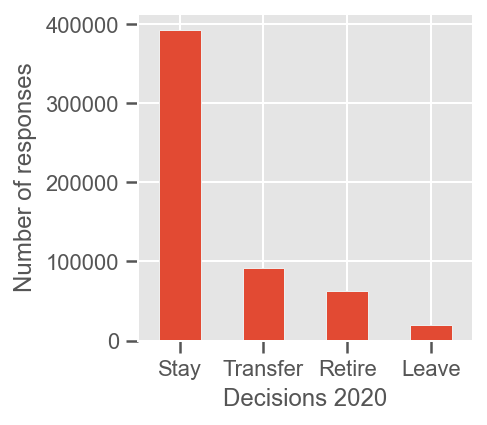

In [21]:
print("StayorGo:Are you considering leaving your organization within the next year_ and if so_ why?"
      "Stay: No.",
      "Transfer: Yes,to take another Federal job.",
      "Retire: Other",
      "Leave: Yes,to take a job outside Federal Gov.")
plt.style.use('ggplot')
# create a bar graph to depict the frequencies for each year survey grouped by "stay or go"
plt.xlabel('Decisions 2016')
plt.ylabel('Number of responses')
byStayorGo2016.plot(kind='bar', figsize=(3,3),rot=0);
plt.show()
byStayorGo2017.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2017')
plt.ylabel('Number of responses')
plt.show()
byStayorGo2018.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2018')
plt.ylabel('Number of responses')
plt.show()
byStayorGo2019.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2019')
plt.ylabel('Number of responses')
plt.show()
byStayorGo2020.plot(kind='bar', figsize=(3,3),rot=0)
plt.xlabel('Decisions 2020')
plt.ylabel('Number of responses')
plt.show()

 # Analyze Employee Engagement Index (EEI) questions for 5 years of survey data.


In [22]:
# make a sub-dataframe only for questions that were included in the EEI index
dfEEI = pd.DataFrame(data=combined5year,columns=['year','agency_id','Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132','StayorGo'])
dfEEI.head(10)

,year,agency_id,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132,StayorGo
0,2016,TR,4.0,4.0,4,4,3,5,5.0,4.0,5.0,4.0,3,4,2,5,3,Stay
1,2016,AF,3.0,NaN,4,2,4,X,4.0,4.0,4.0,3.0,X,X,4,X,3,Stay
2,2016,TR,5.0,4.0,5,NaN,5,4,5.0,4.0,4.0,4.0,4,4,4,4,5,Stay
3,2016,TR,4.0,4.0,4,4,4,5,5.0,5.0,5.0,5.0,3,3,4,5,3,Retire
4,2016,HE,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,4,5,5,Stay
5,2016,HE,4.0,4.0,2,4,5,4,4.0,4.0,4.0,5.0,1,3,1,2,2,Stay
6,2016,CM,3.0,2.0,4,4,4,X,5.0,5.0,5.0,4.0,4,X,4,X,3,Retire
7,2016,AF,5.0,5.0,5,5,5,5,5.0,5.0,5.0,5.0,5,4,5,5,5,Stay
8,2016,AF,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,5,5,5,Retire
9,2016,AG,5.0,5.0,4,4,4,5,5.0,5.0,5.0,5.0,5,5,5,5,5,Stay


# Ensure all EEI question data are in numeric form: Where possible, convert strings to numbers.

In [23]:
dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']]= dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']].apply(pd.to_numeric,errors='coerce')

In [24]:
dfEEI.tail(10)

,year,agency_id,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132,StayorGo
624790,2020,HS,5.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,Stay
624791,2020,HS,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Stay
624792,2020,HS,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Stay
624793,2020,HS,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,NaN,4.0,Stay
624794,2020,HS,1.0,4.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,3.0,5.0,2.0,Retire
624795,2020,HS,4.0,4.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,2.0,2.0,3.0,2.0,Transfer
624796,2020,HS,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Stay
624797,2020,HS,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,Transfer
624798,2020,HS,4.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,Retire
624799,2020,HS,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,Stay


In [25]:
dfEEI.describe()

,year,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
count,2.732092e+06,2.714021e+06,2.713057e+06,2.708267e+06,2.675026e+06,2.706020e+06,2.641728e+06,2.673575e+06,2.670711e+06,2.671371e+06,2.673409e+06,2.601691e+06,2.498127e+06,2.615324e+06,2.506124e+06,2.612326e+06
mean,2.018206e+03,3.892961e+00,4.039856e+00,3.403266e+00,3.523792e+00,4.131097e+00,3.912410e+00,4.119914e+00,4.245753e+00,3.966252e+00,4.090176e+00,3.184621e+00,3.481229e+00,3.635467e+00,3.715589e+00,3.533088e+00
std,1.368376e+00,1.075541e+00,9.545277e-01,1.180824e+00,1.190464e+00,8.694855e-01,1.125589e+00,1.035939e+00,9.756713e-01,1.178057e+00,1.086124e+00,1.247318e+00,1.213221e+00,1.100786e+00,1.169134e+00,1.212328e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [26]:
#check the values in our variables of interest
print(f"StayorGo: {dfEEI['StayorGo'].unique()}")


StayorGo: ['Stay' 'Retire' 'Transfer' nan 'Leave']


# Use boxplots to analyze scores for EEI questions, grouped by responses to  Stay or Go, 2016-2020.  
The results show that employees who answered "Stay" rated highly on questions in the EEI index. Employees who expressed an intent to "Leave" rated lower on questions in the EEI index. The analysis below shows the most striking contrast appearing in Q108, Q127, and Q128.

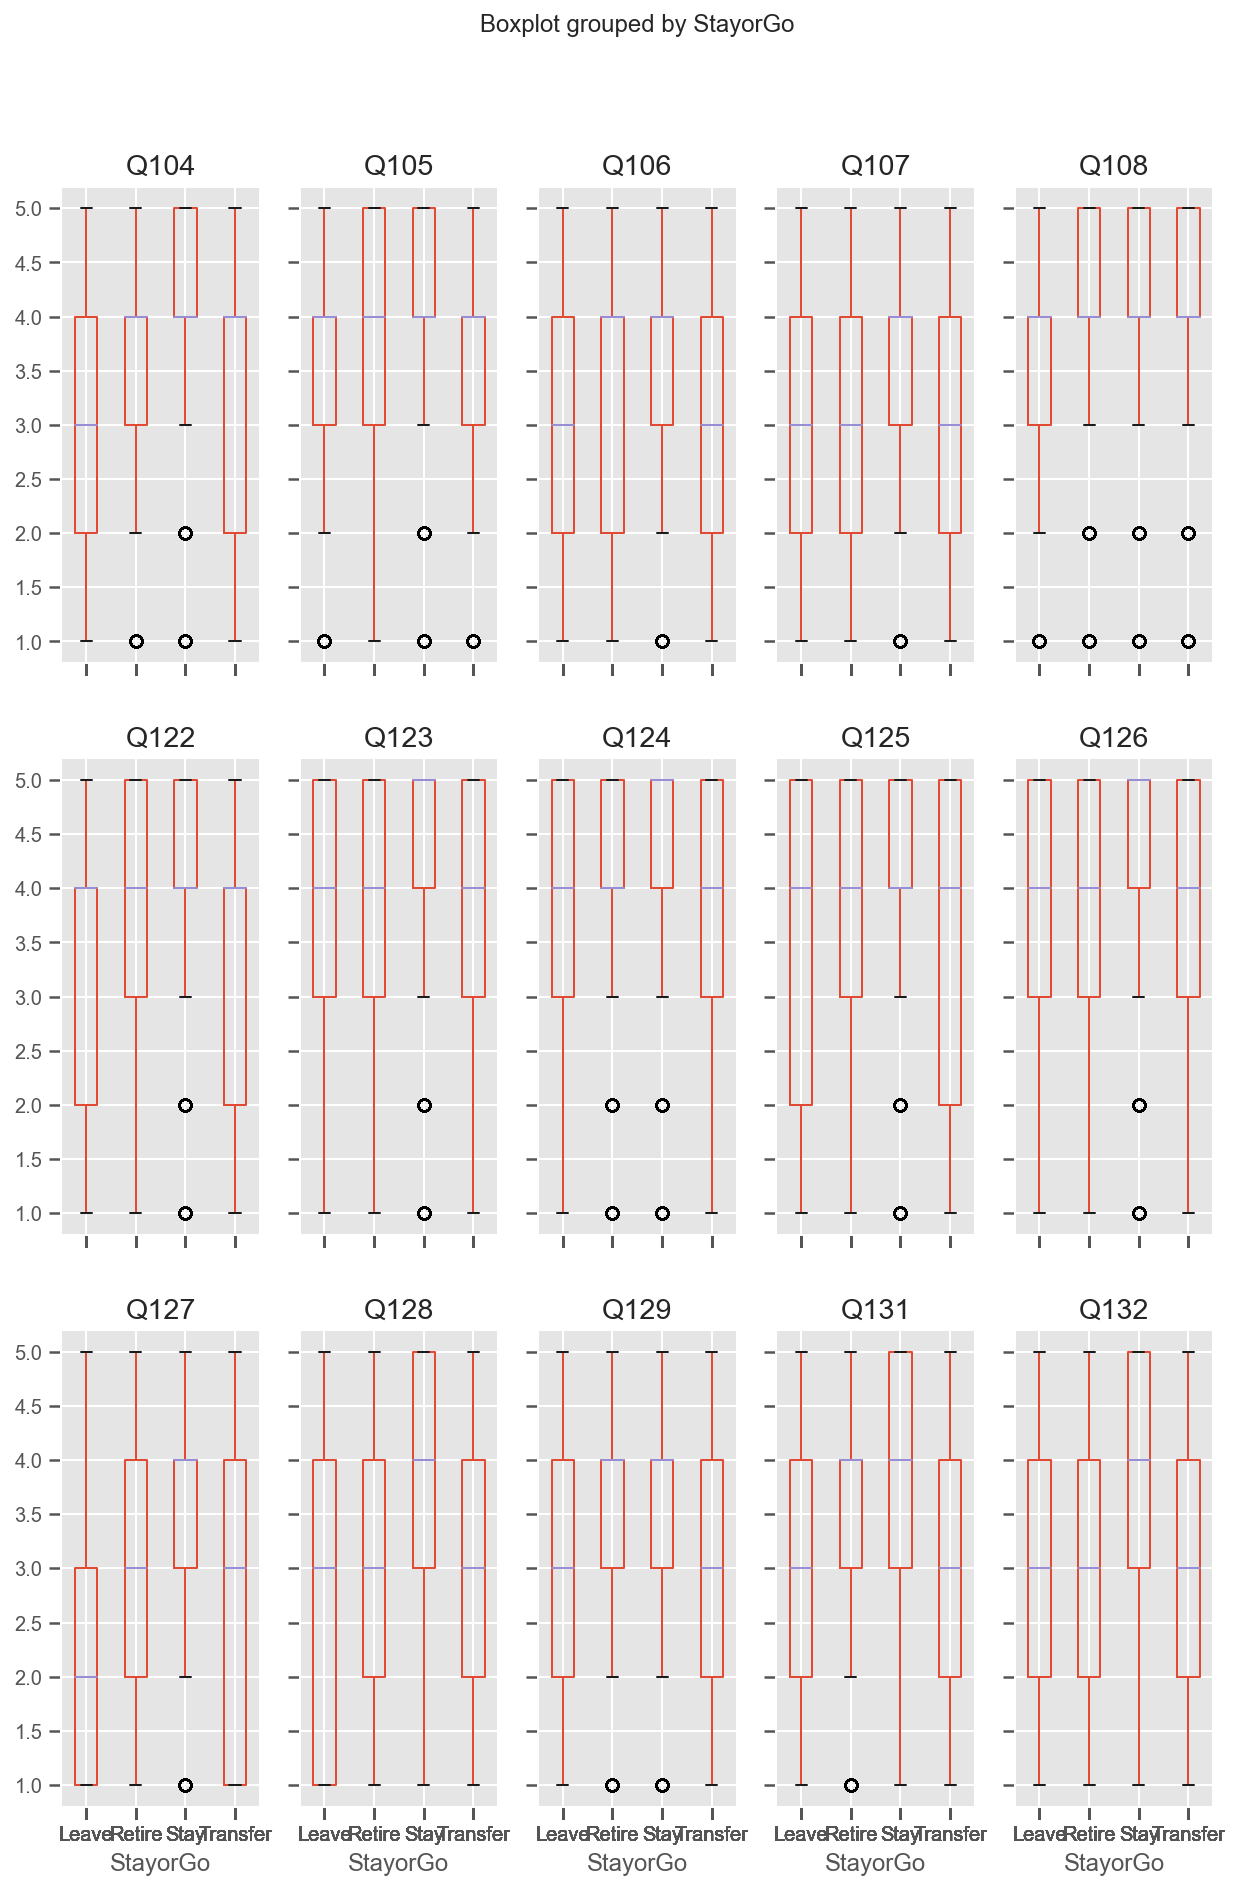

In [27]:
#Go is Left, Stay is Right
boxplot=dfEEI.boxplot(column=['Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124',
                                'Q125','Q126','Q127','Q128','Q129','Q131','Q132'],
                        by= 'StayorGo',
                        fontsize=10,layout=(3,5),figsize=(10,15))

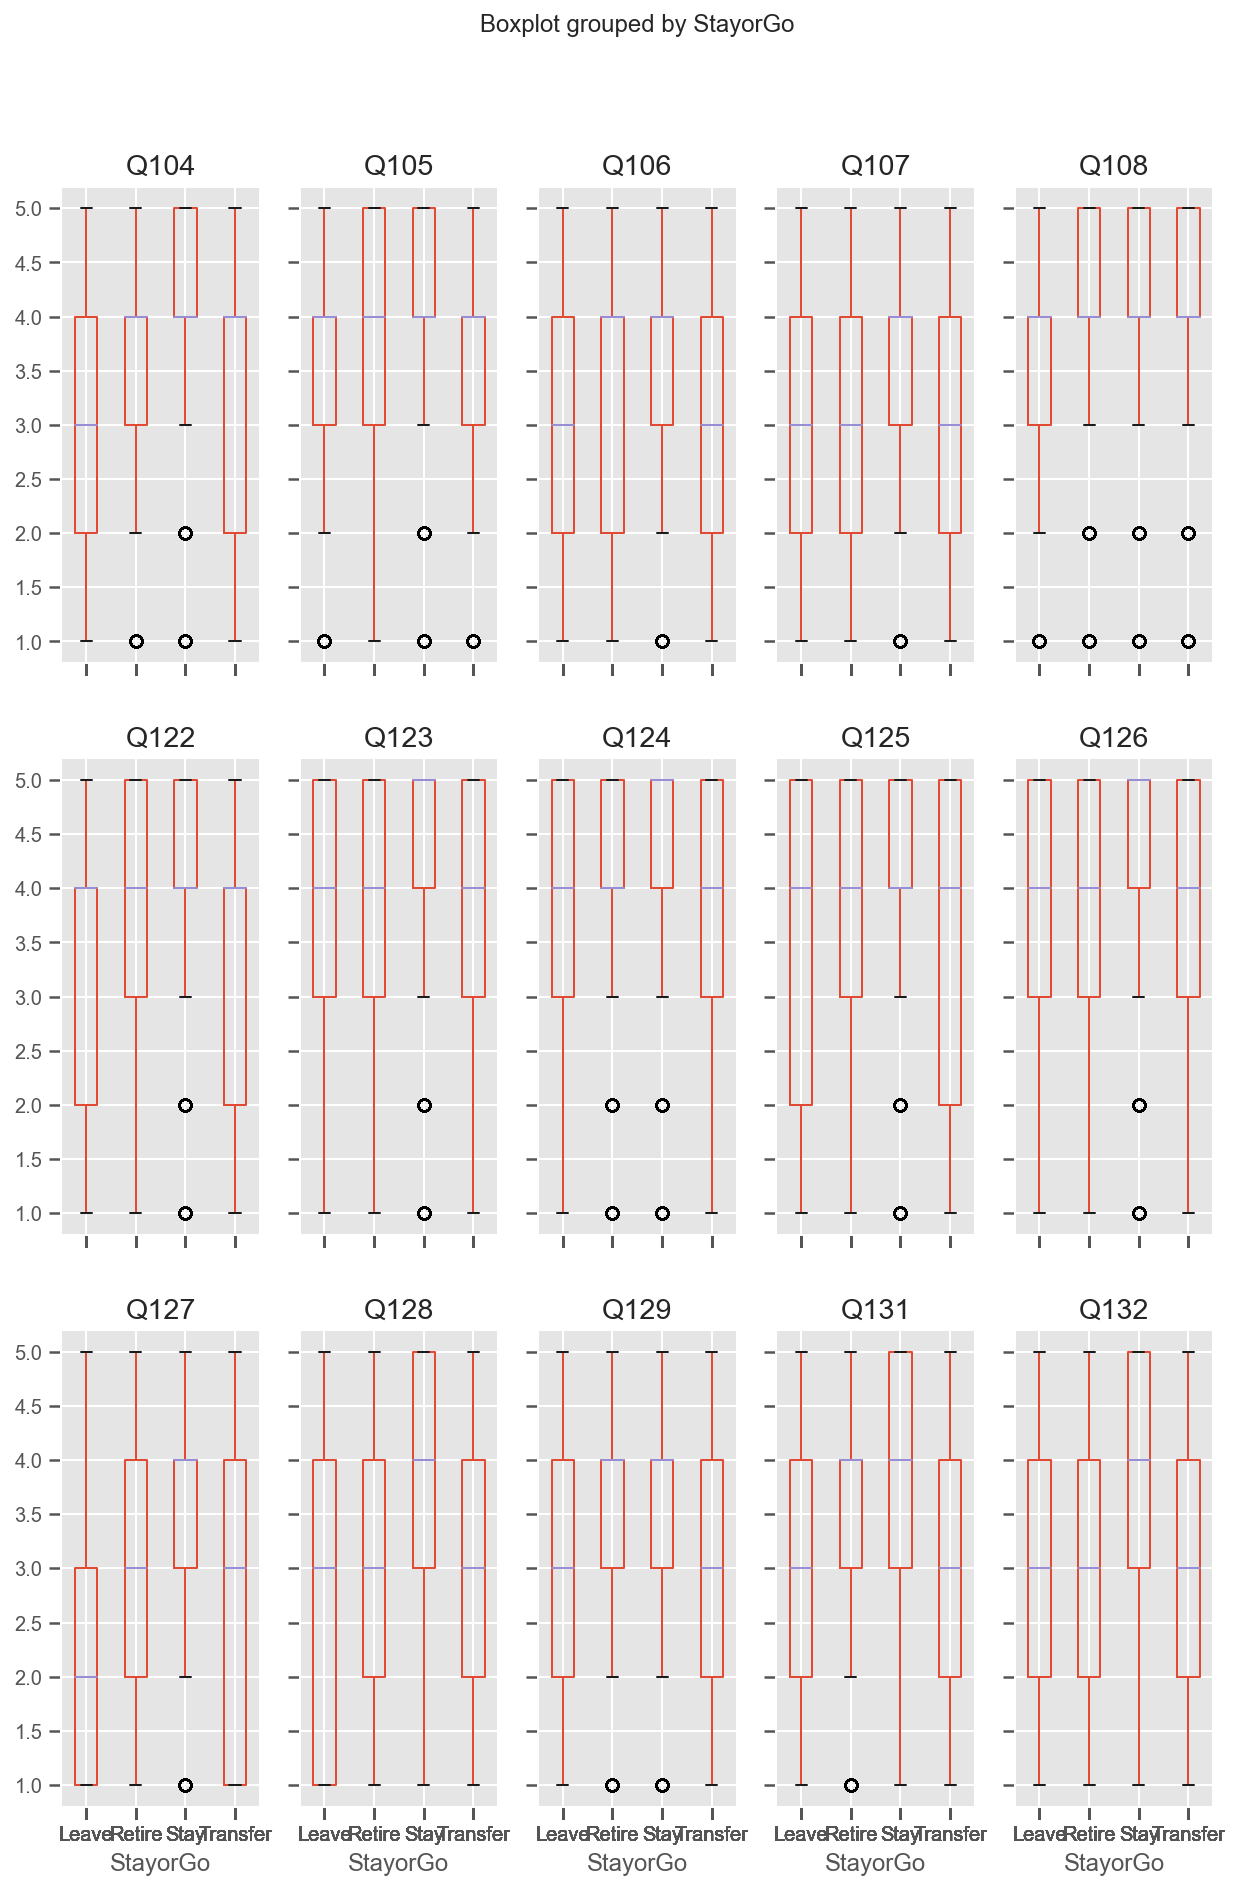

In [28]:
#Go is Left, Stay is Right
boxplot=dfEEI.boxplot(column=['Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124',
                                'Q125','Q126','Q127','Q128','Q129','Q131','Q132'],
                        by= 'StayorGo',
                        fontsize=10,layout=(3,5),figsize=(10,15))

# Conduct further analysis on Q108, Q127, and Q128 in relation to the Stay or Go question. 
Given the sharp contrasts demonstrated above, these three survey questions could be the key factors that predict an employee's intent to Stay or Go within the next year.

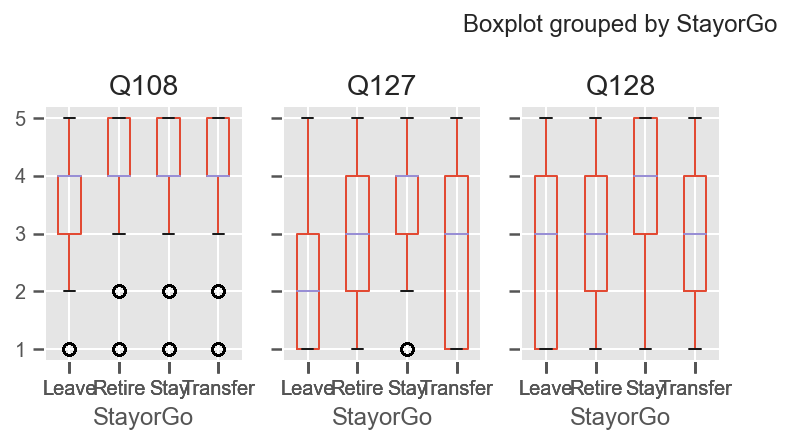

In [29]:
#Q108:my_work_experience I know how my work relates to the agency's goals.
#Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
#Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
boxplot=dfEEI.boxplot(column=['Q108','Q127','Q128'],
                        by= 'StayorGo',
                        fontsize=10,layout=(3,5),figsize=(10,8))
#Go is Left, Stay is Right

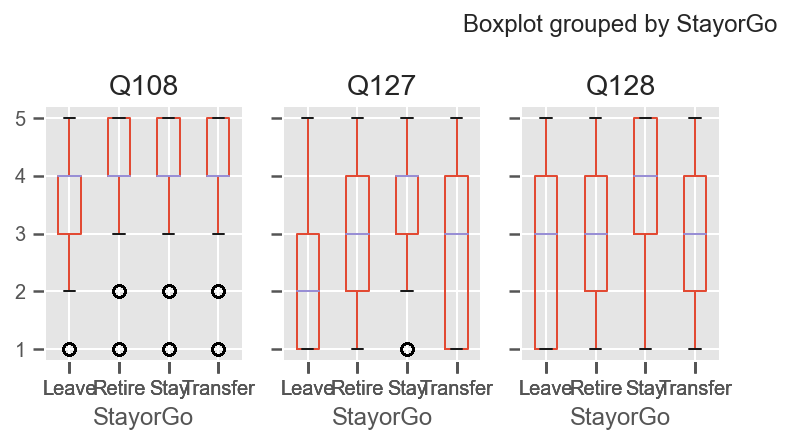

In [30]:
#Q108:my_work_experience I know how my work relates to the agency's goals.
#Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
#Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
boxplot=dfEEI.boxplot(column=['Q108','Q127','Q128'],
                        by= 'StayorGo',
                        fontsize=10,layout=(3,5),figsize=(10,8))
#Go is Left, Stay is Right

# Compare average scores for all EEI questions, grouped by intent to Stay or Go, across all years.
The analysis below summarizes  the average scores from all questions included in the EEI, grouped intent to Stay or Go. The results indicate that overall, the people who expressed intent to "Stay" rated EEI questions highly on average, but those who expressed intent to "Leave" rated EEI questions lower on average. On average, those who expressed intent to leave to find a job outside the Federal Service rated the EEI questions lowest of all. 
# These results suggest that the questions included in the EEI index could be a set of factors that predict the Stay or Go decision (Q237 or Q231), so we will include these quesions in the ML dataset.

In [33]:
dfmean1=dfEEI.groupby('StayorGo').mean()
dfmean1=dfmean1.drop(columns=['year'])
dfmean1


,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
StayorGo,,,,,,,,,,,,,,,
Leave,3.192159,3.532804,2.843964,2.707104,3.708838,3.372651,3.719120,3.891351,3.458801,3.609510,2.394436,2.813107,3.062490,3.086081,2.767877
Retire,3.569943,3.819201,3.159439,3.174168,3.919284,3.596684,3.836253,3.977164,3.635440,3.811242,2.844927,3.140917,3.355533,3.387577,3.156586
Stay,4.136336,4.215871,3.586334,3.808613,4.265695,4.140558,4.310518,4.419816,4.203535,4.300958,3.435160,3.716450,3.840397,3.951147,3.771040
Transfer,3.350766,3.633312,2.991217,2.848344,3.860647,3.370746,3.683362,3.854378,3.404676,3.577439,2.611385,2.940771,3.155870,3.150327,3.020123


In [35]:
dfmeantrans1=dfmean1.transpose()
dfmeantrans1


StayorGo,Leave,Retire,Stay,Transfer
Q104,3.192159,3.569943,4.136336,3.350766
Q105,3.532804,3.819201,4.215871,3.633312
Q106,2.843964,3.159439,3.586334,2.991217
Q107,2.707104,3.174168,3.808613,2.848344
Q108,3.708838,3.919284,4.265695,3.860647
Q122,3.372651,3.596684,4.140558,3.370746
Q123,3.719120,3.836253,4.310518,3.683362
Q124,3.891351,3.977164,4.419816,3.854378
Q125,3.458801,3.635440,4.203535,3.404676
Q126,3.609510,3.811242,4.300958,3.577439


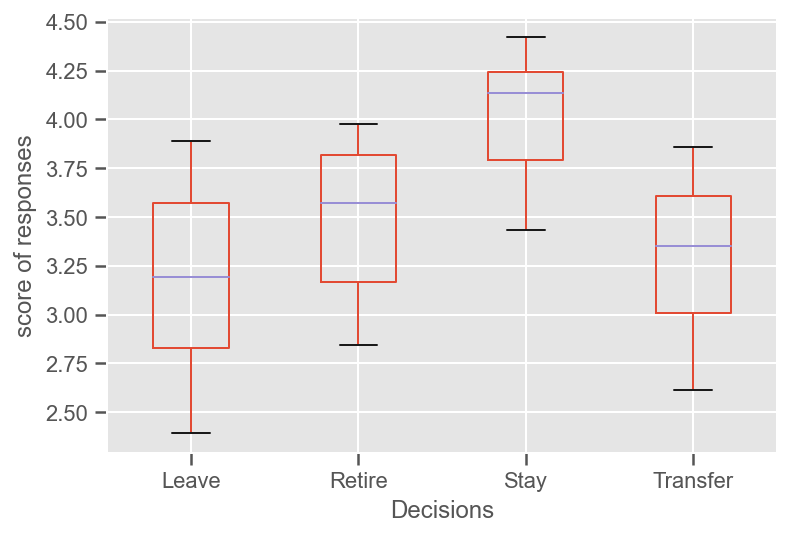

People who decided to LEAVE the Federal workforce (D in 2020) had the lowest average response scores (y-axis) on the questions asked in the EEI index.


In [36]:
dfmeantrans1.boxplot()
plt.xlabel('Decisions')
plt.ylabel('score of responses')
plt.show()
print("People who decided to LEAVE the Federal workforce (D in 2020) had the lowest average response scores (y-axis) on the questions asked in the EEI index.")


# Now analyze Global Satisfaction Index (GSI) for the 5 years of the survey.

In [38]:
# create new dataframe dfGSI
dfGSI = pd.DataFrame(data=combined5year,columns=['year','agency_id','Q118','Q137','Q138','Q139','StayorGo'])
dfGSI.head(10)

,year,agency_id,Q118,Q137,Q138,Q139,StayorGo
0,2016,TR,5.0,4.0,3.0,4.0,Stay
1,2016,AF,2.0,2.0,3.0,2.0,Stay
2,2016,TR,5.0,4.0,4.0,4.0,Stay
3,2016,TR,4.0,3.0,2.0,3.0,Retire
4,2016,HE,5.0,5.0,5.0,5.0,Stay
5,2016,HE,4.0,4.0,1.0,2.0,Stay
6,2016,CM,1.0,2.0,2.0,2.0,Retire
7,2016,AF,5.0,5.0,5.0,5.0,Stay
8,2016,AF,5.0,4.0,4.0,4.0,Retire
9,2016,AG,5.0,5.0,5.0,5.0,Stay


In [39]:
# examine 2020 data
dfGSI.tail(10)

,year,agency_id,Q118,Q137,Q138,Q139,StayorGo
624790,2020,HS,4.0,4.0,4.0,4.0,Stay
624791,2020,HS,5.0,5.0,4.0,5.0,Stay
624792,2020,HS,4.0,5.0,5.0,5.0,Stay
624793,2020,HS,3.0,4.0,4.0,4.0,Stay
624794,2020,HS,2.0,2.0,4.0,2.0,Retire
624795,2020,HS,3.0,4.0,4.0,3.0,Transfer
624796,2020,HS,5.0,5.0,4.0,5.0,Stay
624797,2020,HS,1.0,3.0,4.0,1.0,Transfer
624798,2020,HS,4.0,5.0,5.0,5.0,Retire
624799,2020,HS,5.0,5.0,4.0,5.0,Stay


In [40]:
dfGSI.describe()

,year,Q118,Q137,Q138,Q139
count,2.732092e+06,2.684586e+06,2.632819e+06,2.635587e+06,2.632678e+06
mean,2.018206e+03,3.779857e+00,3.768266e+00,3.596281e+00,3.595169e+00
std,1.368376e+00,1.087723e+00,1.065198e+00,1.145562e+00,1.103388e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [41]:
#Create a frequency count for Stay or Go intent for 2016-2020

print("StayorGo: Are you considering leaving your organization within the next year_ and if so_ why?"
      "Stay: No.",
      "Transfer: Yes,to take another Federal job.",
      "Retire: Other",
      "Leave: Yes,to take a job outside Federal Gov.")
stayorgo= dfGSI['StayorGo'].value_counts()
print(stayorgo)


StayorGo: Are you considering leaving your organization within the next year_ and if so_ why?Stay: No. Transfer: Yes,to take another Federal job. Retire: Other Leave: Yes,to take a job outside Federal Gov.
Stay        1736122
Transfer     442466
Retire       278698
Leave         98658
Name: StayorGo, dtype: int64


# Sample responses to Q139, as one example
"Considering everything, how satisfied are you with your organization?"<br>
5 Very Satisfied<br>
4 Satisfied	<br>
3 Neither Satisfied nor Dissatisfied	<br>
2 Dissatisfied	<br>
1 Very Dissatisfied<br>

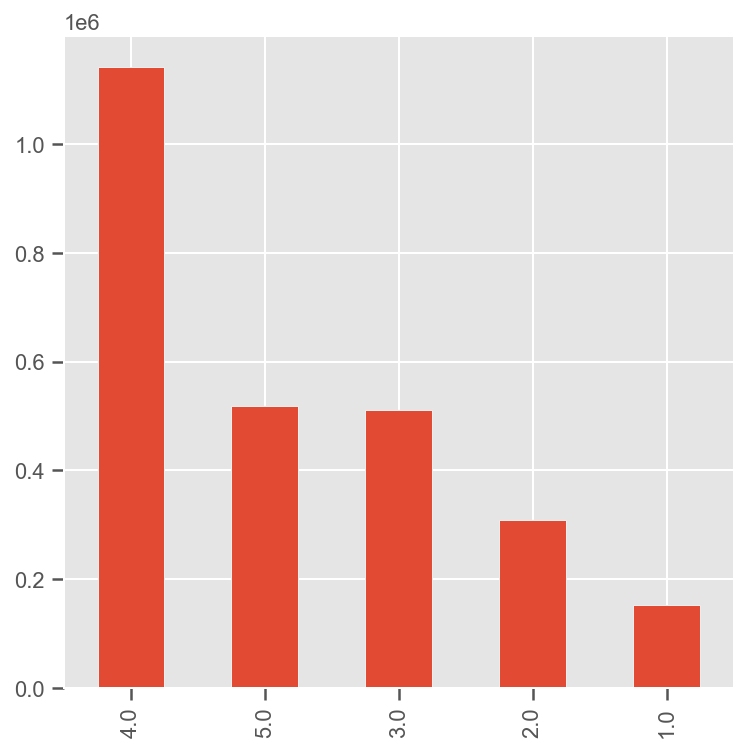

In [42]:
# looking only at responses to Q139, a difference in frequency counts is evident
overallsatis=dfGSI['Q139'].value_counts()
overallsatis.plot(kind='bar', figsize=(6,6));

 # Perform a Chi-Square test to determine...

In [43]:
# make a cross table for chi-squar test
contingency_table = pd.crosstab(
    dfGSI['StayorGo'],
    dfGSI['Q139'],
    margins = True
)
contingency_table


Q139,1.0,2.0,3.0,4.0,5.0,All
StayorGo,,,,,,
Leave,18523,26992,24767,23323,4601,98206
Retire,30970,50922,67641,94785,32082,276400
Stay,37454,115697,274679,856156,442464,1726450
Transfer,60465,102862,121279,130402,25291,440299
All,147412,296473,488366,1104666,504438,2541355


Each cell in the table represents a frequency count. For example, the intersection of 'Stay' row and column '4.0' represents the number of responses of those who answered Stay and also chose Satisfied (4) on Q139. The ALL totals show the number who answered Stay to StayorGo or 4 to Q139 regardless of their answer to the other question.

In [45]:
#sample all the "Stay" responses
Staycount = contingency_table.iloc[2][0:5].values
print(Staycount)

[ 37454 115697 274679 856156 442464]


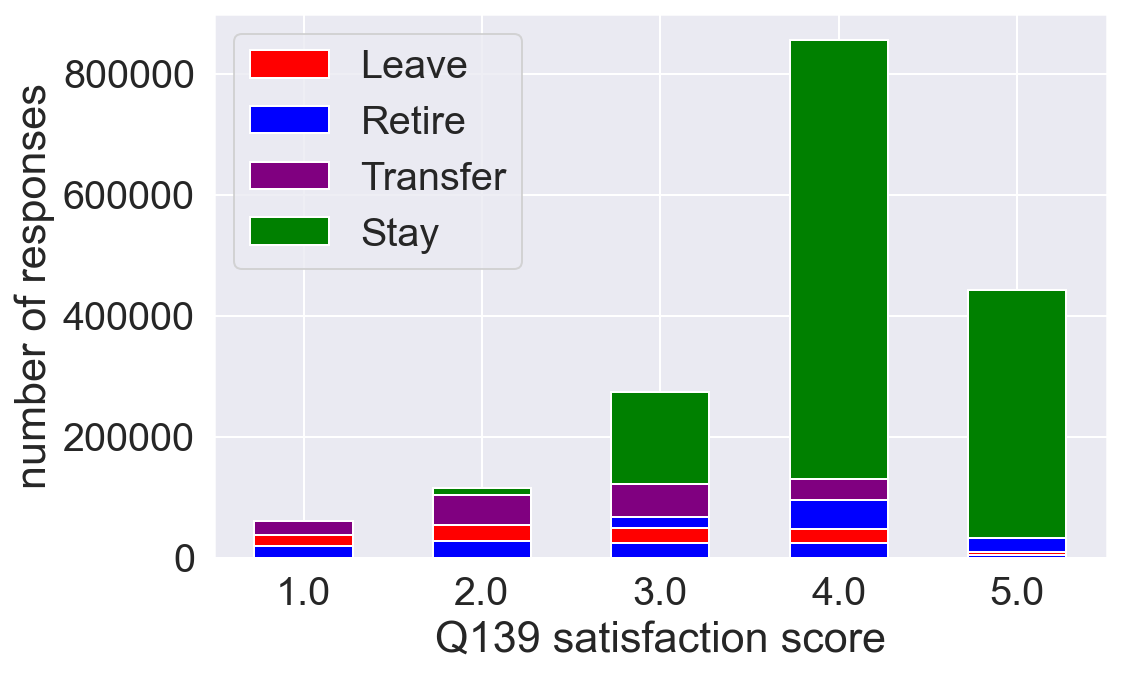

In [49]:
#Assign the frequency values
Staycount = contingency_table.iloc[2][0:5].values
Transfercount = contingency_table.iloc[3][0:5].values
Retirecount = contingency_table.iloc[1][0:5].values
Leavecount = contingency_table.iloc[0][0:5].values
#Plot the bar chart
fig = plt.figure(figsize=(8, 5))
sns.set(font_scale=1.8)
categories = ["1.0","2.0","3.0","4.0","5.0"]
p1= plt.bar(categories, Staycount, 0.55, color='green')
p2 = plt.bar(categories, Transfercount, 0.55, color='purple')
p3 = plt.bar(categories, Retirecount, 0.55, color='blue')
p4 = plt.bar(categories, Leavecount, 0.55, color='red',bottom=Leavecount)
plt.legend((p4[0], p3[0],p2[0], p1[0]), ('Leave', 'Retire','Transfer','Stay'))
plt.xlabel('Q139 satisfaction score')
plt.ylabel('number of responses')
plt.show()
 

The bar chart above shows the intersection of those who answered intent to leave and Q139 regarding satisfaction. It is evident that those expressing an intention to leave answered from Very Dissatisfied to Satisfied on Q139 about their organization. However, the proportion of those reporting the lowest scores were those most likely to leave their organization for some reason: to retire, to take another job in Federal Service, or to leave Federal Service altogether.

# The Null and Alternate Hypotheses
Recall that we are interested in knowing if there is a relationship between Q139, the employee's satisfaction with their organization, and StayorGo, their intention within the next year. In order to do so, we will use the Chi-Square test. But first, we will state our null hypothesis and the alternative hypothesis.

𝐻0: There is no statistically significant relationship between an employee's intent to Stay or Go, and their global satisfaction with their organization as measured by Q139.<br>
𝐻𝑎: There is a statistically significant relationship between an employee's intent to Stay or Go, and their global satisfaction with their organization as measured by Q139. 



# Test 𝐻0: There is no statistically significant relationship between an employee's intent to Stay or Take another Federal Job, and their global satisfaction with the organization as measured by Q139.
We must analyze each response in pair-wise fashion.

In [50]:

f_obs = np.array([Staycount,Transfercount])
print(f_obs)

[[ 37454 115697 274679 856156 442464]
 [ 60465 102862 121279 130402  25291]]


In [51]:
chi2_results = stats.chi2_contingency(f_obs)
print(chi2_results)

(321322.32873926644, 0.0, 4, array([[ 78021.15406538, 174146.23731221, 315496.48302595,
        786082.3099953 , 372703.81560116],
       [ 19897.84593462,  44412.76268779,  80461.51697405,
        200475.6900047 ,  95051.18439884]]))


In [52]:
p_value =chi2_results[1]
df = chi2_results[2]
chi2_test_statistic = chi2_results[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")

The chi-square value calculated is 321322.329, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# Test 𝐻0:There is no statistically significant relationship between Transfer to another Federal Job or Leave to take a job outside the Federal Government, and their global satisfaction with the organization as measured by Q139.

In [53]:
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
f_obs1 = np.array([Transfercount,Leavecount])
print(f_obs1)

[[ 60465 102862 121279 130402  25291]
 [ 18523  26992  24767  23323   4601]]


In [54]:
chi2_results1 = stats.chi2_contingency(f_obs1)
print(chi2_results1)

(3296.7514398244834, 0.0, 4, array([[ 64583.12812694, 106172.80498046, 119411.90472512,
        125690.50199162,  24440.66017586],
       [ 14404.87187306,  23681.19501954,  26634.09527488,
         28034.49800838,   5451.33982414]]))


In [55]:
p_value =chi2_results1[1]
df = chi2_results1[2]
chi2_test_statistic = chi2_results1[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")

The chi-square value calculated is 3296.751, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# Test 𝐻0:There is no statistically significant relationship between Stay and Leave to take a job outside the Federal Government, and their global satisfaction with the organization as measured by Q139.

In [56]:
f_obs2 = np.array([Staycount,Leavecount])
print(f_obs2)

[[ 37454 115697 274679 856156 442464]
 [ 18523  26992  24767  23323   4601]]


In [57]:
chi2_results2 = stats.chi2_contingency(f_obs2)
p_value =chi2_results2[1]
df = chi2_results2[2]
chi2_test_statistic = chi2_results2[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")


The chi-square value calculated is 170133.492, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# The tests above reveal that intent to "Stay" or "Go" bears a significant relationship with an employee's answers to Q139 regarding how satisfied they are with their organization.


# Next, analyze employees' responses to GSI questions in comparison to their intent to Stay or Go.

# The Boxplots below show average scores on questions included in the GSI index grouped by respondents' answers to the Stay or Go question.
Results indicate that employees to expressed intent to "Stay" also rated GSI Index questions highly. Those who expressed intent to "Leave" rated GSI Index questions lower on average.

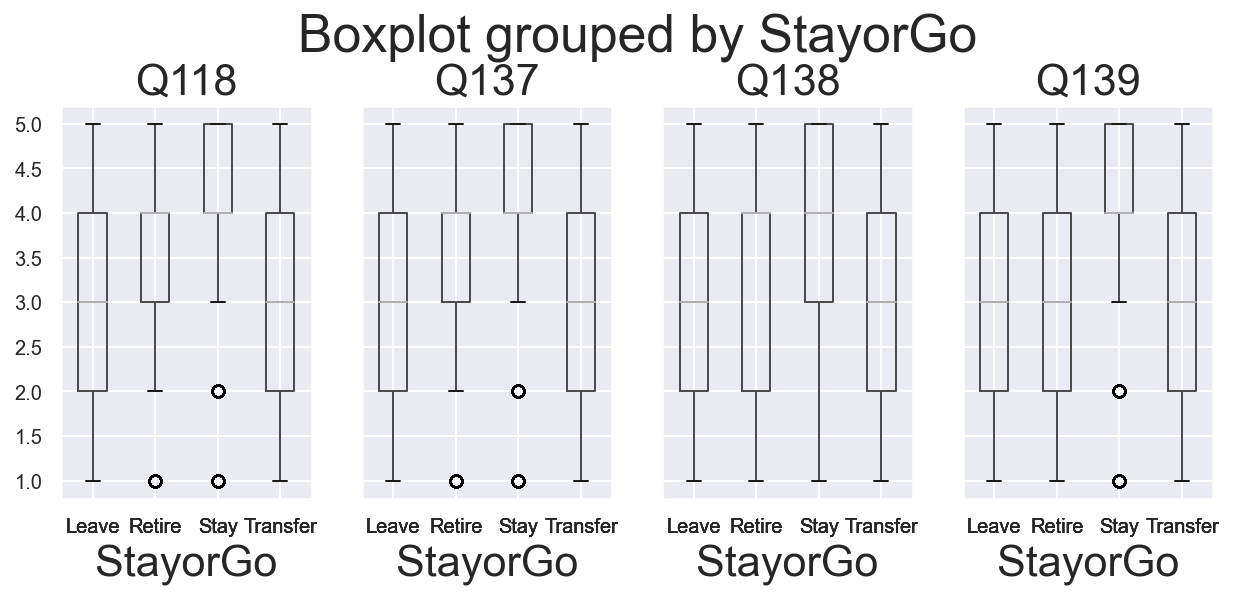

In [58]:
boxplot = dfGSI.boxplot(column=['Q118', 'Q137', 'Q138','Q139'], by= 'StayorGo',fontsize=10,layout=(2,4),figsize=(10,8))  


# Check for correlations among the questions in the GSI Index, grouped by responses to the Stay or Go question. 
Regression plots below show mostly positive correlations between the questions in the GSI Index. This means that employees who rated one of the GSI questions highly, would most likely rate other GSI questions highly. <br>
#Q118	my_agency	I recommend my organization as a good place to work.<br>
#Q137	individual	Considering everything_ how satisfied are you with your job?<br>
#Q138	individual	Considering everything_ how satisfied are you with your pay?<br>
#Q139	individual	Considering everything_ how satisfied are you with your organization?<br>

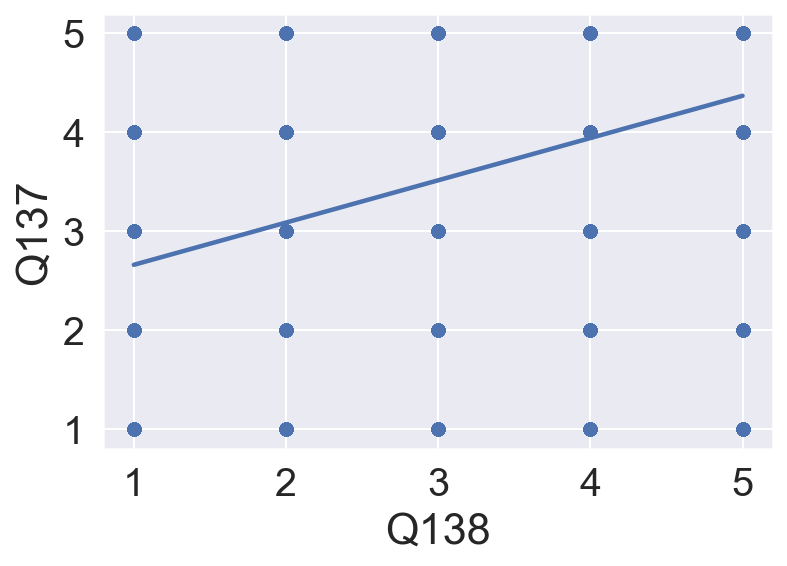

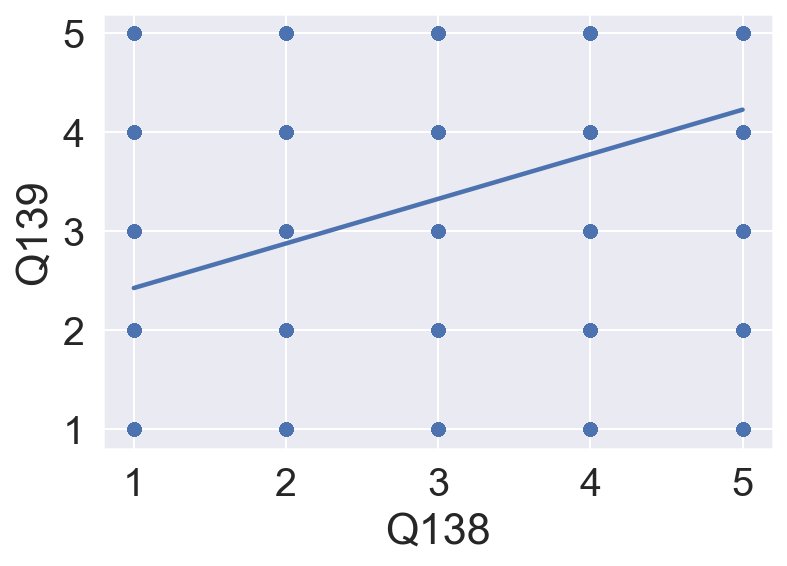

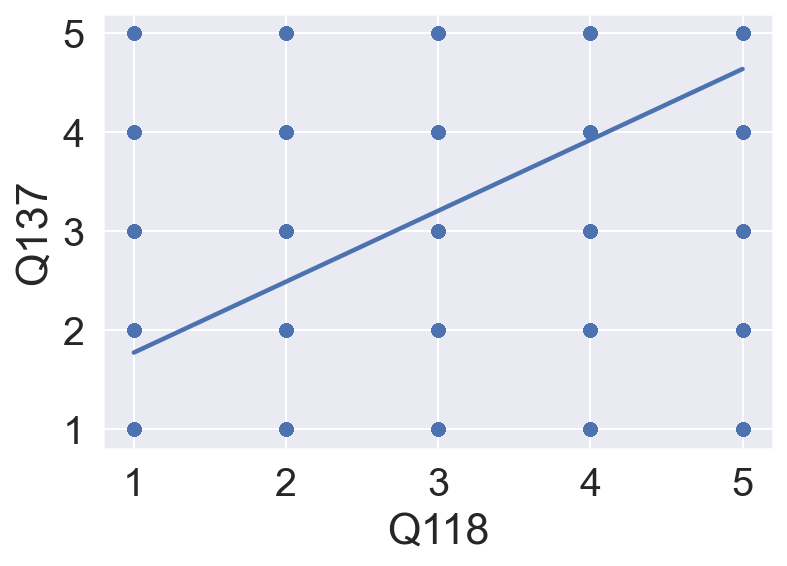

In [49]:
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q137"], scatter=True, fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q139"], fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q118"], y=dfGSI["Q137"], fit_reg=True)
plt.show()


# Example regression analysis for GSI questions Q137 and Q118, grouped by the Stay or Go decision (2016 only).
The results indicate that the scores rated to questions Q137 vs Q118 are positively correlated, regardless of the response to the Stay or Go intention. This means that among all those surveyed those who rate Q137 highly will rate Q118 highly as well.

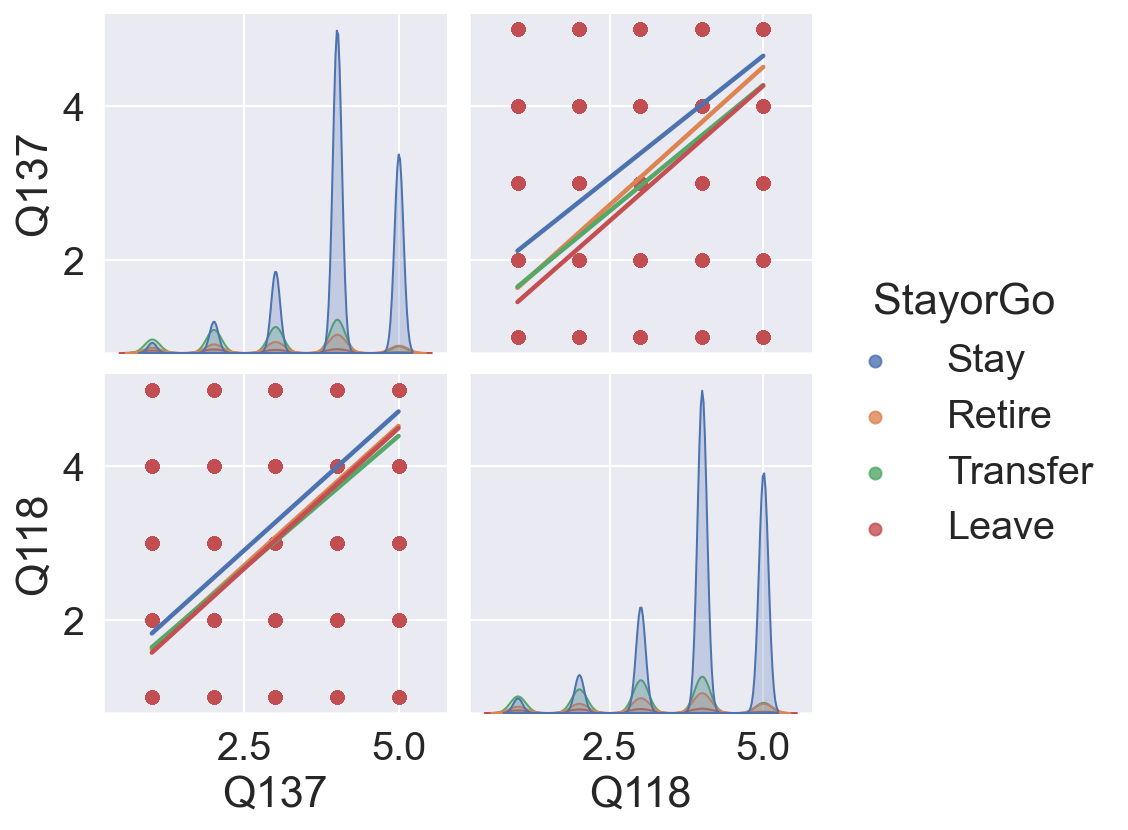

In [65]:
# only use 2016 data for analysis, otherwise the analysis takes forever on my computer 
g = sns.pairplot(dfGSI[dfGSI['year'] == 2016], height=3, kind="reg",
                 vars=["Q137", "Q118"], hue="StayorGo")

# Summarize  the average scores from all questions in the GSI, grouped by the decision to Stay or Go. 
The results indicate that overall, the people who expressed intent to "Stay" rated answers to GSI questions higher, on average, while those with intent to "Leave" rated answers to GSI scores lower, on average. Those who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all. 

In [60]:
dfmean1=dfGSI.groupby('StayorGo').mean()
dfmean1=dfmean1.drop(columns=['year'])
dfmean1


,Q118,Q137,Q138,Q139
StayorGo,,,,
Leave,2.925301,2.806153,2.843239,2.679113
Retire,3.361790,3.352365,3.391627,3.166740
Stay,4.081310,4.081452,3.794831,3.898074
Transfer,3.094798,3.037072,3.134268,2.902775


In [61]:
dfmean1=dfmean1.transpose()
dfmean1


StayorGo,Leave,Retire,Stay,Transfer
Q118,2.925301,3.361790,4.081310,3.094798
Q137,2.806153,3.352365,4.081452,3.037072
Q138,2.843239,3.391627,3.794831,3.134268
Q139,2.679113,3.166740,3.898074,2.902775


<AxesSubplot:>

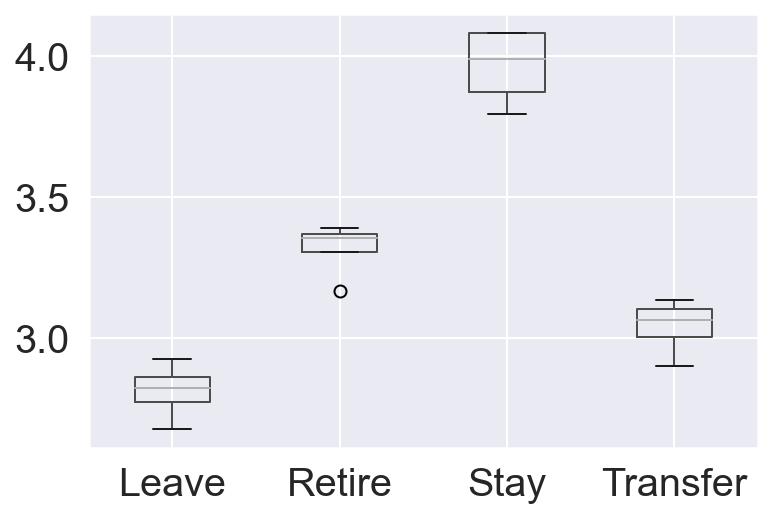

In [62]:
dfmean1.boxplot()


In [64]:
print('Employees who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all.')

Employees who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all.
